In [1]:
%matplotlib inline
import carmcmc as cm
import numpy as np
import matplotlib.pyplot as plt


sigmay = 2.3 
p = 5 
mu = 17.0  
qpo_width = np.array([1.0/100.0, 1.0/300.0, 1.0/200.0]) 
qpo_cent = np.array([1.0/5.0, 1.0/25.0]) 
ar_roots = cm.get_ar_roots(qpo_width, qpo_cent) 
ar_coefs = np.poly(ar_roots)
ma_coefs = np.array([1.0, 4.5, 1.25, 0.0, 0.0])
sigsqr = sigmay ** 2 / cm.carma_variance(1.0, ar_roots, ma_coefs=ma_coefs)

Text(0.5,1,'LC_24646_Z')

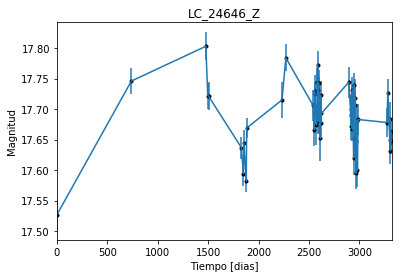

In [2]:
data = np.genfromtxt('LC_24646_Z.dat')
juldate = data[:,0]  
t = juldate - juldate.min()  
y = data[:,1]  
yerr = data[:,2]  

plt.errorbar(t, y, yerr=yerr)
plt.plot(t, y, 'k.')
plt.xlim(t.min(), t.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('LC_24646_Z')

In [3]:
model = cm.CarmaModel(t, y, yerr, p=4, q=1)

In [4]:
%%capture capt
sample = model.run_mcmc(20000)

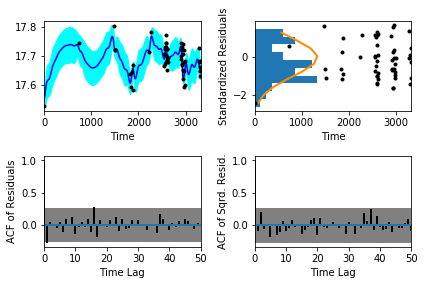

In [5]:
sample.assess_fit()

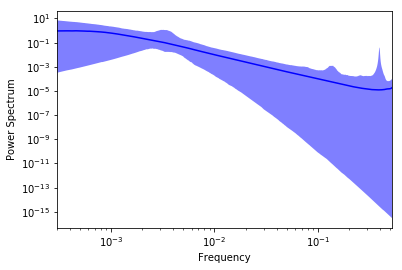

In [6]:
psd_low, psd_hi, psd_mid, frequencies = sample.plot_power_spectrum(percentile=95.0, nsamples=5000)

In [7]:
dt = t[1:] - t[:-1]
noise_level = 2.0 * np.mean(dt) * np.mean(yerr ** 2)

Text(0.000376389,0.047545,'Medida del nivel de ruido')

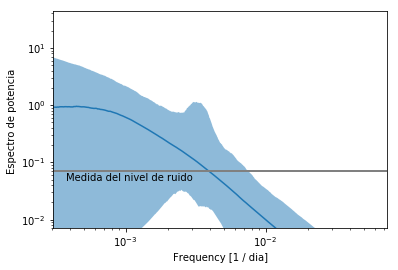

In [8]:
plt.loglog(frequencies, psd_mid)
plt.fill_between(frequencies, psd_hi, y2=psd_low, alpha=0.5)
plt.loglog(frequencies, np.ones(frequencies.size) * noise_level, color='grey', lw=2)
plt.ylim(noise_level / 10.0, plt.ylim()[1])
plt.xlim(frequencies.min(), frequencies[psd_hi > noise_level].max() * 10.0)
plt.ylabel('Espectro de potencia ')
plt.xlabel('Frequency [1 / dia]')
plt.annotate("Medida del nivel de ruido", (1.25 * plt.xlim()[0], noise_level / 1.5))

Text(0.5,1,'Prediccion , valor esperado ')

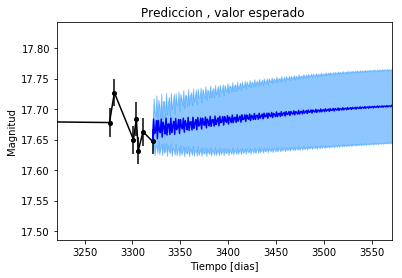

In [9]:
tpredict = t.max() + np.linspace(0.0, 250.0, 250)
ypredict, yp_var = sample.predict(tpredict)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tpredict, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tpredict, ypredict, 'b-')
plt.xlim(tpredict.min() - 100, tpredict.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('Prediccion , valor esperado ')

/usr/local/lib/python2.7/dist-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


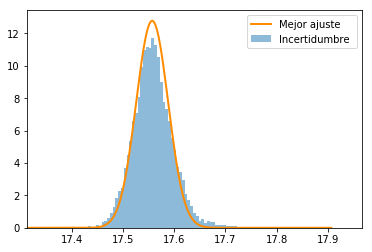

In [10]:
tpredict = 10.0
nsim = 10000
ysim = np.zeros(nsim)
for i in range(nsim):
    ysim[i] = sample.simulate(tpredict, bestfit='random')
yhat, yhvar = sample.predict(tpredict)
plt.hist(ysim, bins=100, alpha=0.5, histtype='stepfilled', normed=True, label='Incertidumbre ')
ymin, ymax = plt.xlim()
ygrid = np.linspace(ymin, ymax, 200)
predictive_pdf = 1.0 / np.sqrt(2.0 * np.pi * yhvar) * np.exp(-0.5 * (ygrid - yhat) ** 2 / yhvar)
plt.plot(ygrid, predictive_pdf, color='DarkOrange', lw=2, label='Mejor ajuste ')
plt.xlim(ymin, ymax + 0.1 * (ymax - ymin))
plt.legend(loc='upper right')

Text(0.5,1,'Interpolacion, camino simulado')

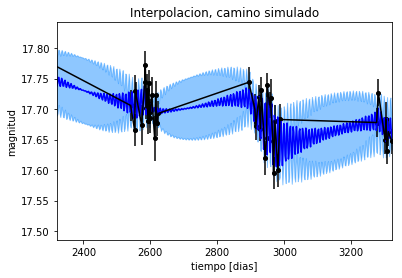

In [11]:
tinterp = t.max() - 1000 + np.linspace(0.0, 1000.0, 500)
ypredict, yp_var = sample.predict(tinterp)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tinterp, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tinterp, ypredict, 'b-')
plt.xlabel('tiempo [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado')

Text(0.5,1,'Interpolacion, camino simulado')

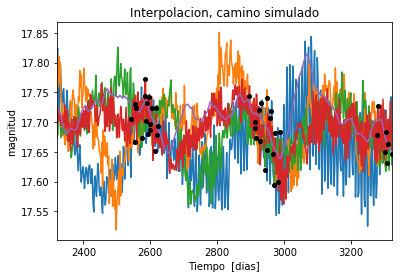

In [12]:
tinterp = t.max() - 1000 + np.linspace(0.0, 1000.0, 500)
npaths = 5
for i in range(npaths):
    ysim = sample.simulate(tinterp, bestfit='random')
    plt.plot(tinterp, ysim)
plt.plot(t, y, 'ko', ms=4)
plt.xlabel('Tiempo  [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado')

In [13]:
sample.parameters

['quad_coefs',
 'logpost',
 'ar_coefs',
 'mu',
 'psd_centroid',
 'loglik',
 'psd_width',
 'var',
 'measerr_scale',
 'sigma',
 'ma_coefs',
 'ar_roots']

In [14]:
sample.posterior_summaries('psd_width')

Calculating effective number of samples
Posterior summary for parameter psd_width  element 0
----------------------------------------------
Effective number of independent samples: 981.743096813
Median: 0.00160492265845
Standard deviation: 0.0750379514103
68% credibility interval: [ 0.00061647  0.00571865]
95% credibility interval: [ 0.00033696  0.17425095]
99% credibility interval: [  3.08524632e-04   6.05622462e-01]
Posterior summary for parameter psd_width  element 1
----------------------------------------------
Effective number of independent samples: 713.755629864
Median: 0.00146860448687
Standard deviation: 0.0370563580694
68% credibility interval: [ 0.00059104  0.00458944]
95% credibility interval: [ 0.00033618  0.06315906]
99% credibility interval: [ 0.00030692  0.25160348]
Posterior summary for parameter psd_width  element 2
----------------------------------------------
Effective number of independent samples: 53.0591093397
Median: 0.132667844619
Standard deviation: 0.311038

In [15]:
sample.posterior_summaries('logpost')

Calculating effective number of samples
Posterior summary for parameter logpost  element 0
----------------------------------------------
Effective number of independent samples: 61.3995007735
Median: 115.243242005
Standard deviation: 4.1225647142
68% credibility interval: [ 108.59856638  117.97442373]
95% credibility interval: [ 105.73215984  119.23946882]
99% credibility interval: [ 103.60616401  119.86982774]


In [16]:
sample.posterior_summaries('ar_coefs')

Calculating effective number of samples
Posterior summary for parameter ar_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ar_coefs  element 1
----------------------------------------------
Effective number of independent samples: 53.1210823672
Median: 1.26195826138
Standard deviation: 1.99487010659
68% credibility interval: [ 0.02730008  4.18095558]
95% credibility interval: [ 0.01152452  6.25462603]
99% credibility interval: [ 0.00892689  6.64507453]
Posterior summary for parameter ar_coefs  element 2
----------------------------------------------
Effective number of independent samples: 383.938585794
Median: 14.4037492154
Standard deviation: 7.35549007259
68% credibility interval: [  0.92558792  14.62934669]
95% credibility interval: [  5.56876586e-0

In [17]:
sample.posterior_summaries('ma_coefs')

Calculating effective number of samples
Posterior summary for parameter ma_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ma_coefs  element 1
----------------------------------------------
Effective number of independent samples: 20020.0319703
Median: 1.23620425137e-10
Standard deviation: 5.78403220042e+103
68% credibility interval: [  8.46087006e-91   2.49028819e+06]
95% credibility interval: [  1.04107373e-189   4.62403360e+047]
99% credibility interval: [  1.14364583e-191   3.49142465e+098]


In [18]:
sample.posterior_summaries('mu')

Calculating effective number of samples
Posterior summary for parameter mu  element 0
----------------------------------------------
Effective number of independent samples: 907.885248338
Median: 17.6837866956
Standard deviation: 0.0283299016974
68% credibility interval: [ 17.66132288  17.70586918]
95% credibility interval: [ 17.6175619   17.73669611]
99% credibility interval: [ 17.57990223  17.76816828]


In [19]:
sample.posterior_summaries('psd_centroid')

Calculating effective number of samples
Posterior summary for parameter psd_centroid  element 0
----------------------------------------------
Effective number of independent samples: 332.965246607
Median: 0.603032670217
Standard deviation: 0.235231154007
68% credibility interval: [ 0.13532851  0.60764477]
95% credibility interval: [ 0.          0.85852428]
99% credibility interval: [ 0.          0.96509886]
Posterior summary for parameter psd_centroid  element 1
----------------------------------------------
Effective number of independent samples: 332.965246607
Median: 0.603032670217
Standard deviation: 0.235231154007
68% credibility interval: [ 0.13532851  0.60764477]
95% credibility interval: [ 0.          0.85852428]
99% credibility interval: [ 0.          0.96509886]
Posterior summary for parameter psd_centroid  element 2
----------------------------------------------
Effective number of independent samples: 512.128256004
Median: 0.0
Standard deviation: 0.00171310544877
68% credi

In [20]:
sample.posterior_summaries('loglik')

Calculating effective number of samples
Posterior summary for parameter loglik  element 0
----------------------------------------------
Effective number of independent samples: 61.3995007735
Median: 115.243242005
Standard deviation: 4.1225647142
68% credibility interval: [ 108.59856638  117.97442373]
95% credibility interval: [ 105.73215984  119.23946882]
99% credibility interval: [ 103.60616401  119.86982774]


In [21]:
sample.posterior_summaries('var')

Calculating effective number of samples
Posterior summary for parameter var  element 0
----------------------------------------------
Effective number of independent samples: 522.852538453
Median: 0.00474957350143
Standard deviation: 0.0047103969396
68% credibility interval: [ 0.0031108  0.0082408]
95% credibility interval: [ 0.00206051  0.01437677]
99% credibility interval: [ 0.00158117  0.02484162]


In [22]:
sample.posterior_summaries('measerr_scale')

Calculating effective number of samples
Posterior summary for parameter measerr_scale  element 0
----------------------------------------------
Effective number of independent samples: 318.926622468
Median: 1.11023864794
Standard deviation: 0.28779888385
68% credibility interval: [ 0.89494003  1.47945444]
95% credibility interval: [ 0.76422808  1.84616578]
99% credibility interval: [ 0.68038378  1.96619463]


In [23]:
sample.posterior_summaries('sigma')

Calculating effective number of samples
Posterior summary for parameter sigma  element 0
----------------------------------------------
Effective number of independent samples: 79.3917800141
Median: 0.00260423958516
Standard deviation: 0.224694164819
68% credibility interval: [  1.32123590e-08   3.40717964e-01]
95% credibility interval: [  2.90872647e-52   6.59646951e-01]
99% credibility interval: [  1.85543119e-103   1.29878057e+000]


In [24]:
sample.posterior_summaries('ar_roots')

Calculating effective number of samples
Posterior summary for parameter ar_roots  element 0
----------------------------------------------
Effective number of independent samples: 981.743096813
Median: (-0.0100840264668-3.80437256767j)
Standard deviation: 1.55137927217
68% credibility interval: [-0.03593135-3.801383j  -0.00387340-3.7980583j]
95% credibility interval: [-1.09485099-0.10282243j -0.00211720-3.8006359j ]
99% credibility interval: [ -3.80523815e+00+0.j          -1.93851744e-03-3.79810204j]
Posterior summary for parameter ar_roots  element 1
----------------------------------------------
Effective number of independent samples: 713.755629864
Median: (-0.00922751413395+1.43450531538j)
Standard deviation: 1.49622774828
68% credibility interval: [-0.02883629+1.6739416j  -0.00371364+2.47238982j]
95% credibility interval: [-0.39684008+3.09011394j -0.00211226+0.03286444j]
99% credibility interval: [-1.58087128+5.53359417j -0.00192846+0.01908276j]
Posterior summary for parameter ar_